In [311]:
from sympy import *
import numpy as np

In [312]:
X = np.array([[1, 2],[2, 3],[3, 1],[2, 5],[4, 3]])
Y = np.array([1, 1, 1, 0, 0])

In [313]:
X = np.hstack((np.ones((X.shape[0],1)),X))
X

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 3., 1.],
       [1., 2., 5.],
       [1., 4., 3.]])

In [314]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [315]:
def loss(theta):
    L=0
    for x , y in zip(X,Y):
        if y == 0:
            L += -np.log(1 - sigmoid(np.dot(theta,x)))
        else:
            L += -np.log(sigmoid(np.dot(theta,x)))
    return L/len(x)

In [316]:
loss(theta = [1,2,3])

12.666723204956805

In [317]:
def gradient(theta):
    G = 0
    for x,y in zip(X,Y):
        G += (sigmoid(np.dot(theta,x)) - y)*x
    return G/len(x)

In [318]:
gradient(theta = [1,2,3])

array([0.66661012, 1.99991289, 2.66656842])

In [319]:
#X.shape[1]
#np.zeros(X.shape[1])
initial_theta = np.zeros(X.shape[1])
learning_rate = 0.1 #0.1, 0.01, 1e-3
tolerance = 1e-4 #1e-5, 1e-6
max_iters = 10_000

In [320]:
k = 0
theta = initial_theta
history_loss = [loss(theta)]
while True:
    k = k + 1
    theta -= theta - learning_rate * gradient(theta)
    history_loss.append(loss(theta))
    if np.linalg.norm(gradient(theta)) < tolerance or k == max_iters:
        break

In [321]:
max_iters

10000

In [322]:
np.linalg.norm(gradient(theta))

0.6910562968409382

In [323]:
history_loss

[1.1552453009332422,
 1.1707650783220882,
 1.1766201871818982,
 1.1809572750567412,
 1.1840824632201061,
 1.1862477397071092,
 1.187710782634841,
 1.1886840893548305,
 1.1893253080196675,
 1.1897451386589089,
 1.1900189322377919,
 1.1901970340583377,
 1.1903126991401836,
 1.1903877364411608,
 1.1904363833876588,
 1.1904679074524955,
 1.190488329758948,
 1.1905015575428088,
 1.1905101243192273,
 1.1905156720342027,
 1.1905192644704774,
 1.1905215906857782,
 1.1905230969515783,
 1.1905240722722144,
 1.1905247037955233,
 1.190525112706603,
 1.1905253774753788,
 1.1905255489120077,
 1.1905256599163063,
 1.1905257317909228,
 1.1905257783292746,
 1.1905258084625456,
 1.1905258279736317,
 1.1905258406069232,
 1.1905258487868904,
 1.190525854083361,
 1.1905258575127875,
 1.1905258597333168,
 1.1905258611710938,
 1.1905258621020438,
 1.1905258627048274,
 1.1905258630951254,
 1.1905258633478406,
 1.190525863511472,
 1.1905258636174219,
 1.1905258636860236,
 1.190525863730443,
 1.190525863759204,

In [324]:
X_pred = np.array([1,1,4])
prob_pred = sigmoid(np.dot(theta, X_pred))
prob_pred

0.568249110397417

In [325]:
y_pred = 1 if prob_pred >= 0.5 else 0
y_pred

1

In [326]:
a = -theta[1]/theta[2]
b = -theta[0]/theta[2]
a,b

(-0.3650470050024344, 0.11049123587685172)

In [327]:
import matplotlib.pyplot as plt

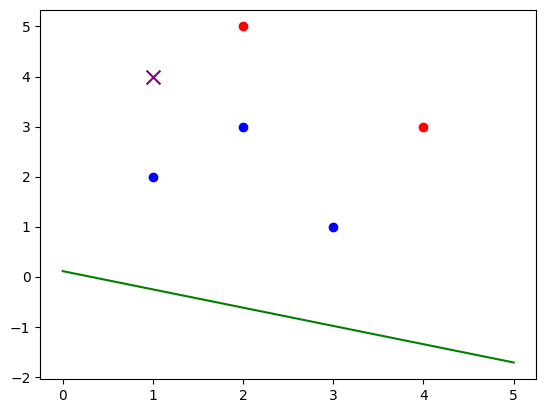

In [328]:
plt.figure()
plt.scatter(X[Y==1][:,1],X[Y==1][:,2], color='blue')
plt.scatter(X[Y==0][:,1],X[Y==0][:,2], color='red')
plt.scatter(X_pred[1], X_pred[2], color='purple', marker = 'x', s=100)
X1 = np.linspace(0, 5, 100)
X2 = a * X1 + b
plt.plot(X1, X2, color='green')
plt.show()

In [329]:
#phương pháp newton
def Hess(theta):
    H = 0
    for x in X:
        s = sigmoid(np.dot(theta, x))
        H += s * (1 - s) * np.dot(np.expand_dims(x, axis=1), np.expand_dims(x, axis=0))
    return H/len(X)

In [330]:
Hess([1,2,3])

array([[3.39247952e-05, 5.22589740e-05, 5.89410170e-05],
       [5.22589740e-05, 1.07103931e-04, 7.76277316e-05],
       [5.89410170e-05, 7.76277316e-05, 1.09317110e-04]])

In [331]:
initial_theta = np.zeros(X.shape[1])
tolerance = 1e-3 #1e-5, 1e-6
max_iters = 1_00

In [332]:
k = 0
theta = initial_theta
history_loss = [loss(theta)]
while True:
    k = k + 1
    if np.linalg.det(Hess(theta)) < 1e-6:
        break
    theta -= np.dot(np.linalg.inv(Hess(theta)), gradient(theta))
    history_loss.append(loss(theta))
    if np.linalg.norm(gradient(theta)) < tolerance or k == max_iters:
        break

In [333]:
max_iters
history_loss

[1.1552453009332422,
 0.16692811746007508,
 0.034385924527188756,
 0.006689538263134798]

In [334]:
np.linalg.inv(Hess([1,2,3]))

array([[15914509.78231431, -3185414.44857448, -6318689.65270864],
       [-3185414.44857447,   656824.21033826,  1251073.99261879],
       [-6318689.65270864,  1251073.99261879,  2527618.57082642]])

In [335]:
x = np.array([1,2,3])
np.dot(x, x.T)
np.expand_dims(x, axis=1)

array([[1],
       [2],
       [3]])

In [336]:
np.expand_dims(x, axis=0)
np.dot(np.expand_dims(x, axis=1), np.expand_dims(x, axis=0))

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])